<a href="https://colab.research.google.com/github/vardhaman3/ML-PROJECT/blob/vardhaman/G_VARDHAMAN_(COVID_19).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

COVID-19 Outbreak Analysis


We all know that coronavirus is spreading on a daily basis in India. So, let's try to visualise how fast it is spreading.

First, let's look at the dashboard created by Johns Hopkins University. You can look at the following live dashboard to see the real-time trend.

COVID-19 Live Dashboard

Now, let's create a similar map for India using Python to visualise the most affected states in India due to coronavirus. After the class, you can share it with your parents, relatives and friends by sending them the link to the map.



In [ ]:
# G vardhaman
# Download data
!git clone https://github.com/CSSEGISandData/COVID-19.git

# Install 'geocoder'
!pip install geocoder

# Importing modules
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime 
import geocoder
import folium
from folium import plugins 

# DataFrame for the world
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
conf_df = pd.read_csv(conf_csv)
grouped_conf_df = conf_df.groupby(by = ['Country/Region'], as_index = False).sum()

# DataFrame for India
india_df = pd.read_csv("https://api.covid19india.org/csv/latest/state_wise.csv")
india_df = india_df.iloc[1:36, :]
state_latitudes = []
state_longitudes = []
for i in india_df.index:
    state = india_df['State'][i]
    state_lat = geocoder.osm(state).lat
    state_lng = geocoder.osm(state).lng
    state_latitudes.append(state_lat)
    state_longitudes.append(state_lng)

state_latitudes = pd.Series(data = state_latitudes, index = india_df.index)
state_longitudes = pd.Series(data = state_longitudes, index = india_df.index)
india_df['Latitude'] = state_latitudes
india_df['Longitude'] = state_longitudes

# state_coordinates = [(19.7515, 75.7139), # Maharashtra
#                     (11.1271, 78.6569), # Tamil Nadu
#                     (15.9129, 79.7400), # Andhra Pradesh
#                     (15.317, 75.7139), # Karnataka
#                     (28.7041, 77.1025), # Delhi
#                     (26.8467, 80.9462), # UP
#                     (22.9868, 87.8550), # WB
#                     (25.0961, 85.3131), # Bihar
#                     (18.1124, 79.0193), # Telangana
#                     (22.2587, 71.1924), # Gujarat
#                     (26.2006, 92.9376), # Assam
#                     (27.0238, 74.2179), # Rajasthan
#                     (20.9517, 85.0985), # Odisha
#                     (29.0588, 76.0856), # Haryana
#                     (22.9734, 78.6569), # Madhya Pradesh
#                     (10.8505, 76.2711), # Kerala
#                     (31.1471, 75.3412), # Punjab
#                     (33.7782, 76.5762), # Jammu and Kashmir
#                     (23.6102, 85.2799), # Jharkhand
#                     (21.2787, 81.8661), # Chattisgarh
#                     (30.0668, 79.0193), # Uttarakhand
#                     (15.2993, 74.1240), # Goa
#                     (23.9408, 91.9882), # Tripura
#                     (11.9416, 79.8083), # Puducherry
#                     (24.6637, 93.9063), # Manipur
#                     (31.1048, 77.1734), # Himachal Pradesh
#                     (26.1584, 94.5624), # Nagaland
#                     (28.2180, 94.7278), # Arunachal Pradesh
#                     (11.7401, 92.6586), # Andaman and Nicobar
#                     (34.1700, 77.5800), # Ladakh
#                     (30.7333, 76.7794), # Chandigarh
#                     (20.1809, 73.0169), # Dadra and Nagar Haveli
#                     (25.4670, 91.3662), # Meghalaya
#                     (27.5330, 88.5122), # Sikkim
#                     (23.1645, 92.9376), # Mizoram
#                      ]
                  
# ind_state_lat = pd.Series([s[0] for s in state_coordinates], index = india_df.index)
# ind_state_lng = pd.Series([s[1] for s in state_coordinates], index = india_df.index)

# india_df['Latitude'] = ind_state_lat
# india_df['Longitude'] = ind_state_lng

# DataFrame for the US
us_conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_conf_df = pd.read_csv(us_conf_csv)
us_conf_df = us_conf_df.dropna()
grouped_us_conf_df = us_conf_df.groupby(by = ['Combined_Key'], as_index = False).sum()

# Function to get total confirmed cases in a country
def get_total_confirmed_cases_for_country(country_name):
    total_cases_country = conf_df[conf_df['Country/Region'] == country_name].iloc[:, 4:].apply(sum, axis = 0)
    total_cases_country.index = pd.to_datetime(total_cases_country.index)
    return total_cases_country

# Function to get total confirmed cases in the world
def get_total_confirmed_global_cases():
    global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0)
    global_cases.index = pd.to_datetime(global_cases.index)
    return global_cases

# Function to create a line plot
def line_plot(your_name, plot_background, fig_width, fig_height, country_name, colour, linewidth, markertype):
    dt_series = None
    if country_name != 'global':
        dt_series = get_total_confirmed_cases_for_country(country_name)
    else:
        dt_series = get_total_confirmed_global_cases()
    plt.style.use(plot_background)
    plt.figure(figsize = (fig_width, fig_height))
    plt.title(f'{country_name.upper()}: Total Coronavirus Cases Reported\nCreated by {your_name.upper()}\nPowered by GAJJALA VARDHAMAN', fontsize = 16)
    plt.plot(dt_series.index, dt_series, c = colour, lw = linewidth, marker = markertype, markersize = 7)
    plt.xticks(rotation = 45)
    plt.ylabel("Total Cases")
    plt.grid(linestyle='--', c='grey')
    plt.show()

# Add minimap
def add_minimap(map_name):
    # Plugin for mini map
    minimap = plugins.MiniMap(toggle_display = True)
    map_name.add_child(minimap) # Add minimap
    plugins.ScrollZoomToggler().add_to(map_name) # Add scroll zoom toggler to map
    plugins.Fullscreen(position='topright').add_to(map_name) # Add full screen button to map

# Add title to map
def add_title(map_name, country, your_name):
    title_html = '''
        <h2 align="center" style="font-size:20px"><b>Coronavirus Total Confirmed Cases in {}</b></h2>
        <h4 align="center" style="font-size:16px"><i>Created by</i> {}</h4>
        <h4 align="center" style="font-size:16px"><i>Powered by</i>
            <a href="https://www.whitehatjr.com/"> GAJJALA VARDHAMAN</a>
        </h4>
             '''.format(country, your_name.upper())   
    return map_name.get_root().html.add_child(folium.Element(title_html))

# Function to create folium maps using for India, US and the world
def folium_map_with_circles(your_name, country, map_width, map_height, left_margin, top_margin, map_tile, zoom, circle_color, minimap):
    last_col = conf_df.columns[-1]
    if country == 'India':
        india_map = folium.Map(location = [22.3511148, 78.6677428], 
                               width = map_width, height = map_height,
                               left = f"{left_margin}%", top = f"{top_margin}%",
                               tiles = map_tile, zoom_start = zoom)
        
        if minimap == True:
            add_minimap(india_map)
    
        add_title(india_map, country, your_name)    
        for i in india_df.index:
            folium.Circle(radius = float(india_df.loc[i, 'Confirmed']) / 3,
                          location = [india_df.loc[i, 'Latitude'], india_df.loc[i, 'Longitude']],
                          popup = "{}\n {}\n on {}".format(india_df.loc[i, 'State'], 
                                                          india_df.loc[i, 'Confirmed'], 
                                                          india_df.loc[i, 'Last_Updated_Time']),
                          
                          color = circle_color,
                          fill = True).add_to(india_map)
        return india_map

    elif country == 'US':
        us_map = folium.Map(location = [39.381266, -97.922211], 
                            width = map_width, height = map_height, 
                            left = f"{left_margin}%", top = f"{top_margin}%",
                            tiles = map_tile, zoom_start = zoom)
        if minimap == True:
            add_minimap(us_map)
        
        add_title(us_map, country, your_name)
        for i in grouped_us_conf_df.index:
            folium.Circle(location = [grouped_us_conf_df.loc[i, 'Lat'], grouped_us_conf_df.loc[i, 'Long_']], 
                          radius = int(grouped_us_conf_df.loc[i, last_col]), 
                          popup = "{}\n {}\n on {}".format(grouped_us_conf_df.loc[i, 'Combined_Key'],
                                                          grouped_us_conf_df.loc[i, last_col],
                                                          last_col),
                          color = circle_color,
                          fill = True).add_to(us_map)
        return us_map
    
    elif country == 'World':
        world_map = folium.Map(location = [0, 0], 
                            width = map_width, height = map_height, 
                            left = f"{left_margin}%", top = f"{top_margin}%",
                            tiles = map_tile, zoom_start = zoom)
        if minimap == True:
            add_minimap(world_map)
        
        add_title(world_map, country, your_name)
        for i in grouped_conf_df.index:
            folium.Circle(location = [grouped_conf_df.loc[i, 'Lat'], grouped_conf_df.loc[i, 'Long']], 
                          radius = int(grouped_conf_df.loc[i, last_col]) / 2, 
                          popup = "{}\n {}\n on {}".format(grouped_conf_df.loc[i, 'Country/Region'],
                                                          grouped_conf_df.loc[i, last_col], 
                                                          last_col),
                          color = circle_color, 
                          fill = True).add_to(world_map)
        return world_map
    else:
        print("\nWrong input! Enter either India, US or World.\n")

# Total confirmed cases in the descending order.
grouped_conf_df = conf_df.groupby(by='Country/Region', as_index=False).sum()
desc_grp_conf_df = grouped_conf_df.sort_values(by=conf_df.columns[-1], ascending=False)

# Function to create a bar plot displaying the top 10 countries having the most number of coronavirus confirmed cases.
def bar_plot(your_name, num_countries, width, height):
    last_col = conf_df.columns[-1]
    latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d, %Y') # Modify the latest date in the 'Month DD, YYYY' format.
    plt.figure(figsize = (width, height))
    plt.title(f'Top {num_countries} Countries with Highest COVID-19 Confirmed Cases\nCreated by {your_name.upper()}\n VARDHAMAN', 
              fontsize = 16)
    sns.barplot(desc_grp_conf_df[last_col].head(num_countries), desc_grp_conf_df['Country/Region'].head(num_countries), orient = 'h')
    plt.xlabel(f'Total Confirmed Cases (in millions) as of {latest_date}')
    plt.show()

# Non-cumulative Confirmed Cases.
non_cum_conf_df = desc_grp_conf_df.iloc[:, :4]
for i in range(len(desc_grp_conf_df.columns[3:]) - 1):
    series = desc_grp_conf_df[desc_grp_conf_df.columns[3 + (i + 1) ]] - desc_grp_conf_df[desc_grp_conf_df.columns[3 + i]]
    non_cum_conf_df[desc_grp_conf_df.columns[3 + (i + 1)]] = series

# Function to get the total non-cumulative confirmed cases in a country.
def get_total_daily_confirmed_cases_for_country(country_name):
    total_daily_cases = non_cum_conf_df[non_cum_conf_df['Country/Region'] == country_name].iloc[:, 4:].apply(sum, axis = 0)
    total_daily_cases.index = pd.to_datetime(total_daily_cases.index)
    return total_daily_cases

# Line plot for the daily (non-cumulative) confirmed cases in various countries.
def daily_cases_line_plot(your_name, num_countries, width, height):
    plt.figure(figsize=(width, height))
    plt.title(f'Non-Cumulative COVID-19 Confirmed Cases\nCreated by {your_name.upper()}\nPowered by GAJJALA  VARDHAMAN', fontsize = 16)
    for region in non_cum_conf_df.iloc[:num_countries, :]['Country/Region']:
        total_conf_cases = get_total_daily_confirmed_cases_for_country(region)
        plt.plot(total_conf_cases.index[53:], total_conf_cases[53:], lw=2.5, label=region)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid('major', linestyle='--', c='grey')
    plt.show()

fatal: destination path 'COVID-19' already exists and is not an empty directory.


 Line Plot^
 

**  India Total coronavirus case Reported**
USEING  line_plot()


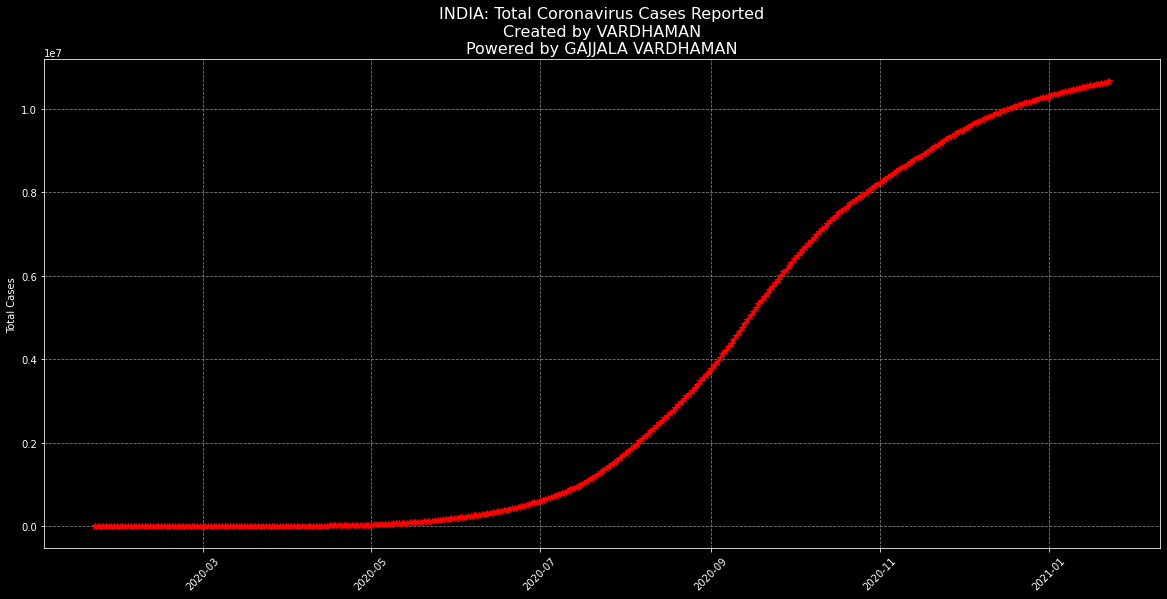

In [ ]:
line_plot('vardhaman','dark_background',20,9,'India','red',1,'*')


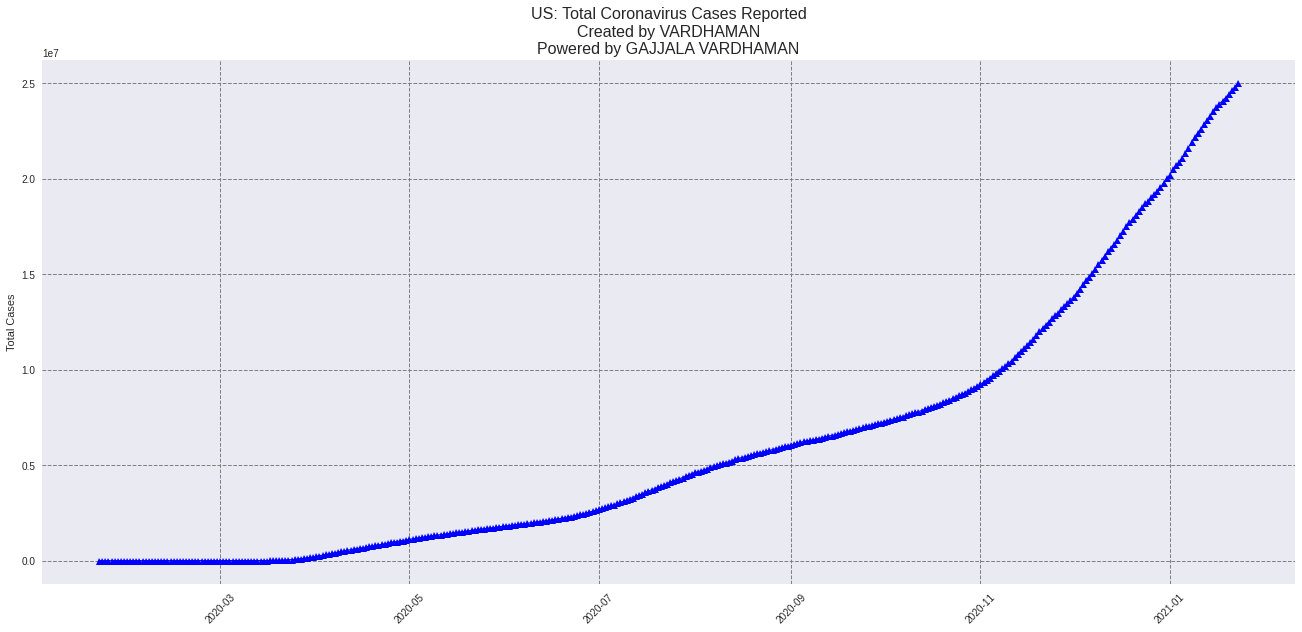

In [ ]:
line_plot('vardhaman','seaborn',20,9,'US','BLUE',1,'^')

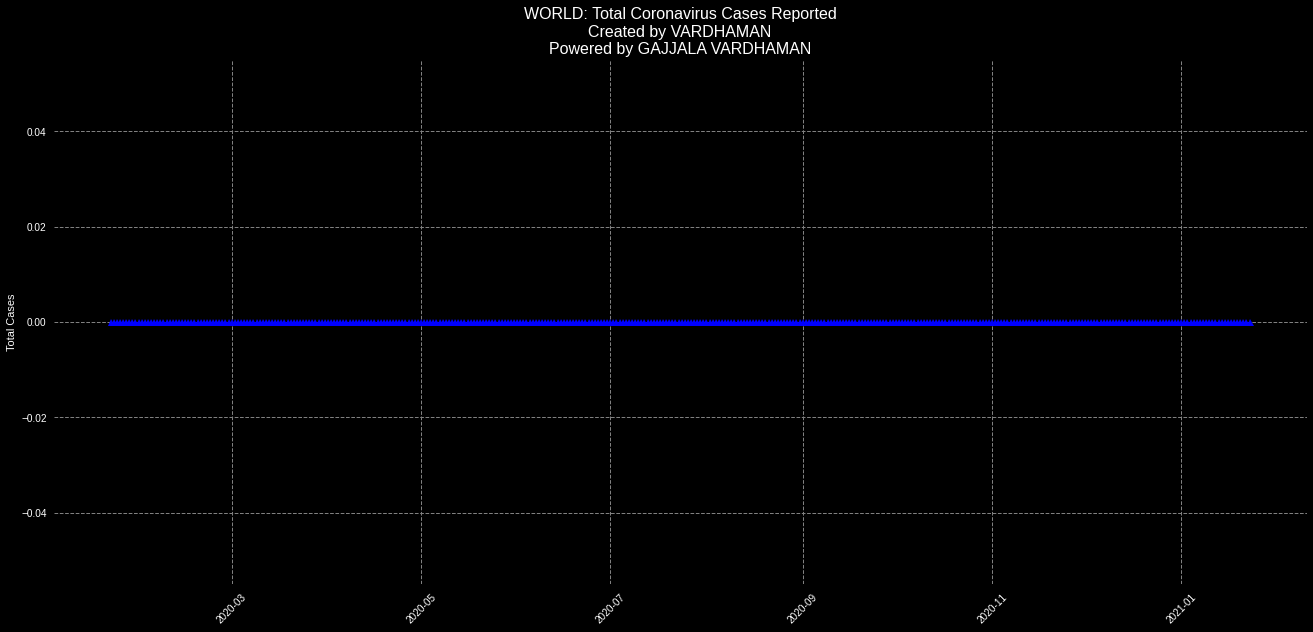

In [ ]:
line_plot('vardhaman','dark_background',20,9,'World','BLUE',1,'^')

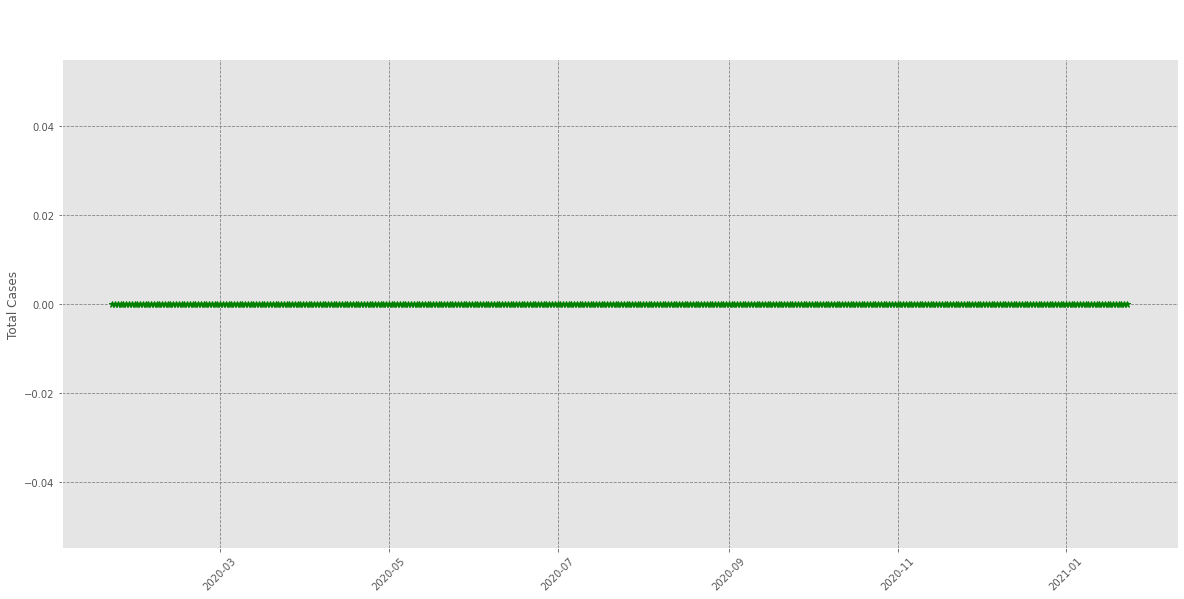

In [ ]:
#TOTAL coronavarius in kerala,..and also we can give as any state instead of kerala
line_plot('vardhaman','ggplot',20,9,'Kerala','Green',1,'*')

Map^^

Let's create a map for India. For this, we are going to use a dataset showing state-wise data for India. To view the first five rows for the total confirmed cases in India, call the head() function on the india_df variable which stores the data.

In [ ]:
india_df

State  Confirmed  ...   Latitude  Longitude
1                                Maharashtra    2009106  ...  18.906836  75.674158
2                                  Karnataka     935478  ...  14.520390  75.722352
3                             Andhra Pradesh     887010  ...  15.924091  80.186381
4                                 Tamil Nadu     834171  ...  10.909433  78.366535
5                                     Kerala     884243  ...  10.352874  76.512040
6                                      Delhi     633924  ...  28.651718  77.221939
7                              Uttar Pradesh     598445  ...  27.130334  80.859666
8                                West Bengal     567714  ...  22.996495  87.685588
9                                     Odisha     334300  ...  20.543124  84.689732
10                                 Rajasthan     316485  ...  26.810578  73.768455
11                                 Telangana     293253  ...  17.849592  79.115166
12                              Chhattisgarh     296326  ...  21.663736  81.840635
13                                   Haryana     267075  ...  29.000000  76.000000
14                                     Bihar     259766  ...  25.644085  85.906508
15                                   Gujarat     258687  ...  22.385001  71.745263
16                            Madhya Pradesh     253405  ...  23.814342  77.534072
17                                     Assam     216976  ...  26.407384  93.255130
18                                    Punjab     171733  ...  30.929321  75.500484
19                         Jammu and Kashmir     124006  ...  33.557447  75.061520
20                                 Jharkhand     118232  ...  23.455981  85.255730
21                               Uttarakhand      95586  ...  30.041738  79.089691
22                          Himachal Pradesh      57189  ...  31.816760  77.349321
23                                       Goa      52867  ...  15.300454  74.085513
24                                Puducherry      38830  ...  10.915649  79.806949
25                                   Tripura      33341  ...  23.775082  91.702509
26                                   Manipur      28970  ...  24.720882  93.922939
27                                Chandigarh      20686  ...  30.733442  76.779714
28                         Arunachal Pradesh      16818  ...  28.093770  94.592133
29                                 Meghalaya      13727  ...  25.537943  91.299910
30                                  Nagaland      12076  ...  26.163056  94.588491
31                                    Ladakh       9675  ...  33.945641  77.656858
32                                    Sikkim       6068  ...  27.601029  88.454136
33               Andaman and Nicobar Islands       4993  ...  12.611239  92.831654
34                                   Mizoram       4351  ...  23.214617  92.868761
35  Dadra and Nagar Haveli and Daman and Diu       3377  ...  20.717986  70.932399

[35 rows x 14 columns]

In [ ]:
# List the first five rows of the dataset containing the total number of confirmed cases in India.
india_df.head(15)

State  Confirmed  ...   Latitude  Longitude
1      Maharashtra    2006354  ...  18.906836  75.674158
2        Karnataka     935478  ...  14.520390  75.722352
3   Andhra Pradesh     886852  ...  15.924091  80.186381
4       Tamil Nadu     834171  ...  10.909433  78.366535
5           Kerala     884243  ...  10.352874  76.512040
6            Delhi     633739  ...  28.651718  77.221939
7    Uttar Pradesh     598445  ...  27.130334  80.859666
8      West Bengal     567714  ...  22.996495  87.685588
9           Odisha     334150  ...  20.543124  84.689732
10       Rajasthan     316485  ...  26.810578  73.768455
11       Telangana     293253  ...  17.849592  79.115166
12    Chhattisgarh     296326  ...  21.663736  81.840635
13         Haryana     267075  ...  29.000000  76.000000
14           Bihar     259766  ...  25.644085  85.906508
15         Gujarat     258687  ...  22.385001  71.745263

[15 rows x 14 columns]

In [ ]:
# List the last five rows of the dataset containing the total number of confirmed cases in India.
india_df.tail(15)

State  Confirmed  ...   Latitude  Longitude
21                               Uttarakhand      95586  ...  30.041738  79.089691
22                          Himachal Pradesh      57189  ...  31.816760  77.349321
23                                       Goa      52867  ...  15.300454  74.085513
24                                Puducherry      38830  ...  10.915649  79.806949
25                                   Tripura      33341  ...  23.775082  91.702509
26                                   Manipur      28970  ...  24.720882  93.922939
27                                Chandigarh      20686  ...  30.733442  76.779714
28                         Arunachal Pradesh      16818  ...  28.093770  94.592133
29                                 Meghalaya      13727  ...  25.537943  91.299910
30                                  Nagaland      12076  ...  26.163056  94.588491
31                                    Ladakh       9675  ...  33.945641  77.656858
32                                    Sikkim       6068  ...  27.601029  88.454136
33               Andaman and Nicobar Islands       4993  ...  12.611239  92.831654
34                                   Mizoram       4351  ...  23.214617  92.868761
35  Dadra and Nagar Haveli and Daman and Diu       3377  ...  20.717986  70.932399

[15 rows x 14 columns]

In [ ]:
india_df

State  Confirmed  ...   Latitude  Longitude
1                                Maharashtra    2009106  ...  18.906836  75.674158
2                                  Karnataka     935478  ...  14.520390  75.722352
3                             Andhra Pradesh     887010  ...  15.924091  80.186381
4                                 Tamil Nadu     834171  ...  10.909433  78.366535
5                                     Kerala     884243  ...  10.352874  76.512040
6                                      Delhi     633924  ...  28.651718  77.221939
7                              Uttar Pradesh     598445  ...  27.130334  80.859666
8                                West Bengal     567714  ...  22.996495  87.685588
9                                     Odisha     334300  ...  20.543124  84.689732
10                                 Rajasthan     316485  ...  26.810578  73.768455
11                                 Telangana     293253  ...  17.849592  79.115166
12                              Chhattisgarh     296326  ...  21.663736  81.840635
13                                   Haryana     267075  ...  29.000000  76.000000
14                                     Bihar     259766  ...  25.644085  85.906508
15                                   Gujarat     258687  ...  22.385001  71.745263
16                            Madhya Pradesh     253405  ...  23.814342  77.534072
17                                     Assam     216976  ...  26.407384  93.255130
18                                    Punjab     171733  ...  30.929321  75.500484
19                         Jammu and Kashmir     124006  ...  33.557447  75.061520
20                                 Jharkhand     118232  ...  23.455981  85.255730
21                               Uttarakhand      95586  ...  30.041738  79.089691
22                          Himachal Pradesh      57189  ...  31.816760  77.349321
23                                       Goa      52867  ...  15.300454  74.085513
24                                Puducherry      38830  ...  10.915649  79.806949
25                                   Tripura      33341  ...  23.775082  91.702509
26                                   Manipur      28970  ...  24.720882  93.922939
27                                Chandigarh      20686  ...  30.733442  76.779714
28                         Arunachal Pradesh      16818  ...  28.093770  94.592133
29                                 Meghalaya      13727  ...  25.537943  91.299910
30                                  Nagaland      12076  ...  26.163056  94.588491
31                                    Ladakh       9675  ...  33.945641  77.656858
32                                    Sikkim       6068  ...  27.601029  88.454136
33               Andaman and Nicobar Islands       4993  ...  12.611239  92.831654
34                                   Mizoram       4351  ...  23.214617  92.868761
35  Dadra and Nagar Haveli and Daman and Diu       3377  ...  20.717986  70.932399

[35 rows x 14 columns]

***`*folium_map_with_circles() function*`***

Let's now create a map for India to show the state-wise total confirmed cases of coronavirus. Using the latitude and longitude values (which are numeric values with decimal), we can create circular markers on a map. For this, you need to use the folium_map_with_circles() function .

Name of the person who is creating the map which should be a text value enclosed within single-quotes ('') or double-quotes ("").

Name of the country for which a map needs to be created. It should be a text value enclosed within single-quotes ('') or double-quotes (""). For the map only three values are supported:



In [ ]:
#Create a map for India to show the state-wise total confirmed cases of coronavirus.

folium_map_with_circles('vardhaman','India',2000,1500,5,6,'Stamen Terrain',5,'blue',True)

In [ ]:
#Create a map for US to show the state-wise total confirmed cases of coronavirus.
folium_map_with_circles('vardhaman','US',2000,1500,5,6,'Stamen Terrain',5,'Yellow',True)

In [ ]:
#Create a map for WORLD to show the state-wise total confirmed cases of coronavirus.

folium_map_with_circles('vardhaman','World',1500,1000,5,6,'Stamen Terrain',5,'brown',True)

In [ ]:

folium_map_with_circles('vardhaman','World',1500,1000,5,6,'Stamen Toner',5,'brown',True)

In [ ]:

folium_map_with_circles('vardhaman','India',1500,1000,5,6,'Stamen Toner',5,'magenta',True)

In [ ]:
#'OpenStreetMap'

folium_map_with_circles('vardhaman','US',1500,1000,5,6,'OpenStreetMap',5,'magenta',True)